In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
data = pd.read_csv('data/salary_data.csv')

In [3]:
data.shape

(30, 2)

In [4]:
data.head(20)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [5]:
# the above output shows the data, which has two variables YearsExperience and Salary
# after that, we need to extract dependent and independent variables from the given data.
# the independent variable(X) is YearsExperience and dependent variable(y) is Salary

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [7]:
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [8]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [9]:
print(y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [10]:
# split both variables into the test set and training set.
# having 30 observations, will take 20 observations for the training set and 10 observations for the test set.

In [11]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
# for simple linear regression, we will not use feature scaling because python libraries take care of it for some cases, so don't need to perform it.

In [13]:
# fitting the simple linear regression model to the training
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [14]:
print ('Coefficients: ', model.coef_)
print ('Intercept: ', model.intercept_)

Coefficients:  [9312.57512673]
Intercept:  26780.09915062818


In [15]:
# fit() function, passed the X_train and y_train which is our training data for the dependent and the independent variable.
# we have fitted our regressor object to the training set so that the model can easily learn the correlations between the predictor and target variables.

In [16]:
# Prediction of test set
# we will provide the test dataset (new observations) to the model to check whether it can predict the correct output or not
# we will create a prediction vector y_pred and x_pred which contains predictions of test data


In [17]:
# prediction of test and train set result
y_pred = model.predict(X_test)
x_pred = model.predict(X_train)

In [18]:
# two variables named y_pred and x_pred will generate in the variable explorer options that contain salary predictions for the training set and test set. 

In [19]:
# visualization
# The scatter () function will create a scatter plot of observations.
# In the x-axis, we will plot the Years of Experience of employees and on the y-axis, salary of employees. In the function, we will pass the real values of training set, which means a year of experience x_train, training set of Salaries y_train, and color of the observations. Here we are taking a green color for the observation, but it can be any color as per the choice.

# Now, we need to plot the regression line, so for this, we will use the plot() function of the pyplot library. In this function, we will pass the years of experience for training set, predicted salary for training set x_pred, and color of the line.

# Next, we will give the title for the plot. So here, we will use the title() function of the pyplot library and pass the name ("Salary vs Experience (Training Dataset)".

# After that, we will assign labels for x-axis and y-axis using xlabel() and ylabel() function

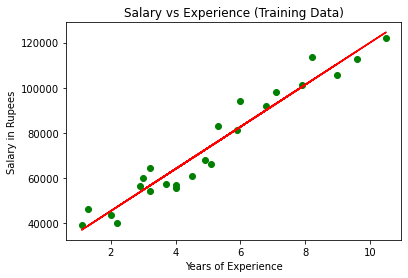

In [20]:
plt.scatter(X_train,y_train, color='green')
plt.plot(X_train,x_pred, color='red')
plt.title("Salary vs Experience (Training Data)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary in Rupees")
plt.show()

In [21]:
# In the above plot, we can see the real values observations in green dots and predicted values are covered by the red regression line. The regression line shows a correlation between the dependent and independent variable.

# The good fit of the line can be observed by calculating the difference between actual values and predicted values. But as we can see in the above plot, most of the observations are close to the regression line, hence our model is good for the training set.

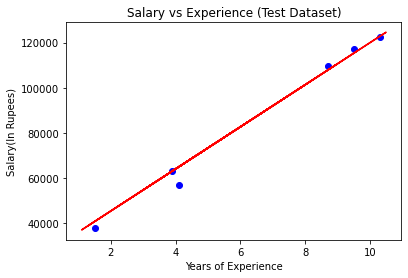

In [22]:
#visualizing the Test set results  
plt.scatter(X_test, y_test, color="blue")   
plt.plot(X_train, x_pred, color="red")    
plt.title("Salary vs Experience (Test Dataset)")  
plt.xlabel("Years of Experience")  
plt.ylabel("Salary(In Rupees)")  
plt.show()  

In [24]:
print('Train Score: ', model.score(X_train, y_train))  
print('Test Score: ', model.score(X_test, y_test))  

Train Score:  0.9411949620562126
Test Score:  0.988169515729126


In [25]:
# The above score tells that our model is 94% accurate with the training dataset and 98% accurate with the test dataset
# In the above plot, there are observations given by the blue color, and prediction is given by the red regression line. As we can see, most of the observations are close to the regression line, hence we can say our Simple Linear Regression is a good model and able to make good predictions.

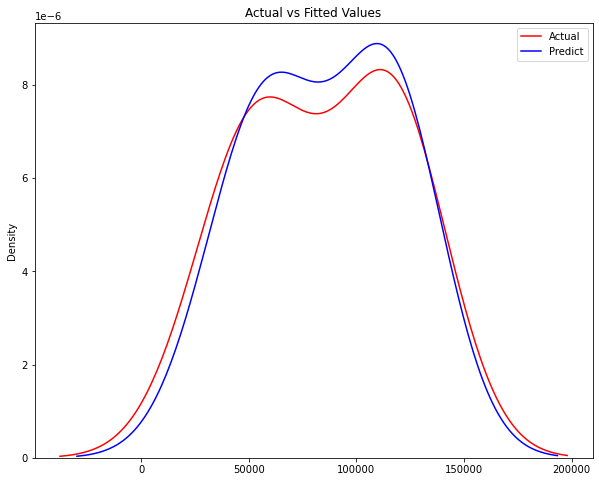

In [26]:
# Actual vs Fitted
plt.figure(figsize=(10, 8))
ax1 = sns.kdeplot(y_test, color="r")
sns.kdeplot(y_pred, color="b", ax=ax1,label='dgs')
plt.legend(['Actual','Predict'])
plt.title('Actual vs Fitted Values')
plt.show()

In [27]:
# As shown above, our model is a good fit

In [28]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))



Mean absolute error: 2446.17
Residual sum of squares (MSE): 12823412.30


In [32]:
# Evaluation Metrics
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('R Squared:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  2446.1723690465055
Mean Squared Error:  12823412.298126549
Root Mean Squared Error:  3580.979237321343
R Squared: 0.988169515729126


In [30]:
# predict person has 7 years of experience
model.predict([[7]])



array([91968.12503773])